In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

In [92]:
#Constants
a,w,v,K,tau,beta,gamma=1e-3,0.8,0.024,10,30,100,10
rho=0.005
sigma=12
modFrequency=0.0039
m=0.25

In [93]:
#Numerical intergrator settings
t_start=0
t_end=400000
transient=200000
t_eval=np.linspace(t_start, t_end, 10000000)

initialState=[0.5,0,1,sigma]

In [94]:
#ODE model for chemostat
def odeModel(t,y):
    F=sigma*(1-(m/2)*(1+np.sin(modFrequency*t)))

    B,I,P,S=y
    B_dot=v*B*(S/(S+K)) - B*(rho+a*w*P)
    I_dot=a*w*B*P - I*(rho + 1/tau)
    P_dot=1e-6-P*(rho + a*(B+I)) + beta*(I/tau)
    S_dot=rho*(F-S) - gamma*v*B*(S/(S+K))

    return [B_dot,I_dot,P_dot,S_dot]

In [95]:
#Solves the ODE model as well as removing transient time
def solveODE(transient,t_s,t_e,i_state,integrator,dt,rtol,atol):
    solution = solve_ivp(odeModel,
                     [t_s,t_e],
                     i_state,method=integrator, t_eval=dt, rtol=rtol,atol=atol)
    temp=solution.t >= transient
    return solution.y[0][temp],solution.y[1][temp],solution.y[2][temp],solution.y[3][temp]

In [96]:
#Create stable inital state
def averageSteadyState(sol):
    return np.mean(sol[0]),np.mean(sol[1]),np.mean(sol[2]),np.mean(sol[3])

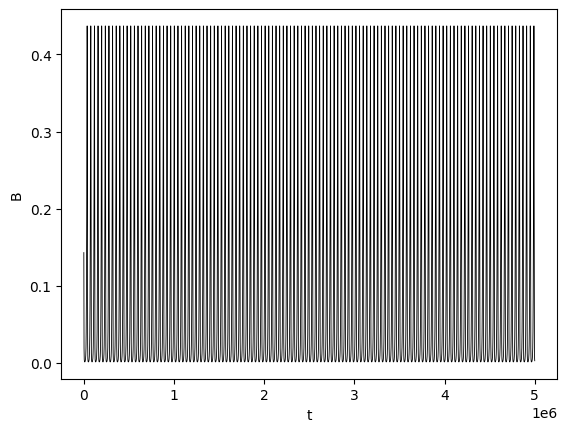

In [97]:
#Plot population of non infected bacteria against time
plotData=solveODE(transient,t_start,t_end,initialState,'LSODA',t_eval,1e-8,1e-11)

plt.plot(plotData[0],color='black',linewidth=0.6)
plt.xlabel("t")
plt.ylabel("B")
plt.show()

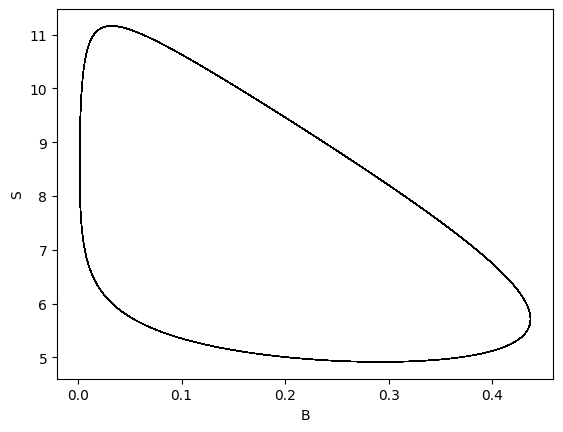

In [98]:
#Plot Substrate concentration against population of non infected bacteria
plt.plot(plotData[0],plotData[3],color='black',linewidth=0.6)
plt.xlabel("B")
plt.ylabel("S")
plt.show()

## FFT Analysis

Text(0, 0.5, 'magnitude')

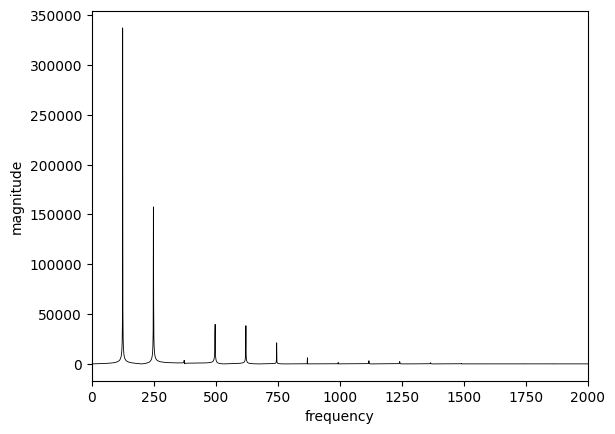

In [ ]:
#Performs FFT anaylsis on population of bacteria to see where the peak frequency for these oscillations
center = len(plotData[0]) // 2
window = 2000
fft_BPlot = np.fft.fft(plotData[0])
plt.plot(np.abs(np.imag(fft_BPlot)),color='black',linewidth=0.6)
plt.xlim(0, window)
plt.xlabel("frequency")
plt.ylabel("magnitude")

## Multistability

In [100]:
#Simulates new system from average values of B,I,S,P
steadyState=averageSteadyState(plotData)
initialState2=[steadyState[0],steadyState[1],steadyState[2],steadyState[3]]
plotData2=solveODE(transient,t_start,t_end,initialState2,'LSODA',t_eval,1e-8,1e-11)

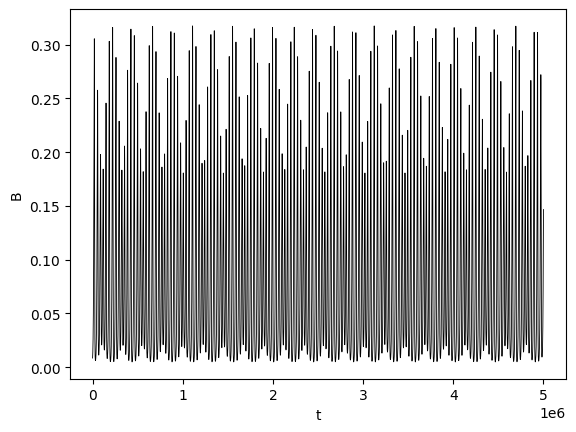

In [101]:
#Plot population of non infected bacteria against time
plt.plot(plotData2[0],color='black',linewidth=0.6)
plt.xlabel("t")
plt.ylabel("B")
plt.show()

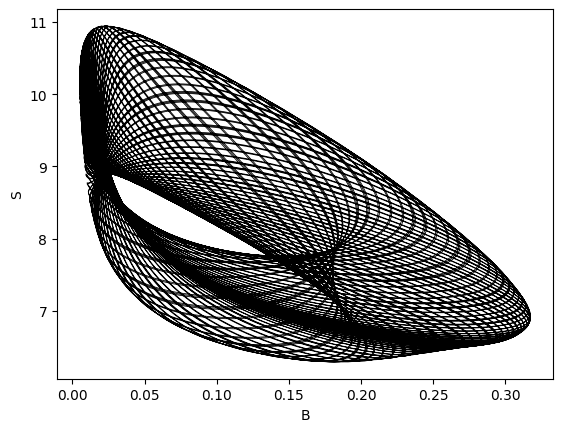

In [102]:
#Plot of substrate concentration against population of non infected bacteria
plt.plot(plotData2[0],plotData2[3],color='black',linewidth=0.6)
plt.xlabel("B")
plt.ylabel("S")
plt.show()